 
# CRISP-DM Methodology

In this section we overview our selected method for engineering our solution. CRISP-DM stands for Cross-Industry Standard Process for Data Mining. It is an open standard guide that describes common approaches that are used by data mining experts. CRISP-DM includes descriptions of the typical phases of a project, including tasks details and provides an overview of the data mining lifecycle. The lifecycle model consists of six phases with arrows indicating the most important and frequent dependencies between phases. The sequence of the phases is not strict. In fact, most projects move back and forth between phases as necessary. It starts with business understanding, and then moves to data understanding, data preparation, modelling, evaluation, and deployment. The CRISP-DM model is flexible and can be customized easily.

 
# Buissness Understanding
### Tasks

    1.Determine business objectives
    2.Assess situation
    3.Determine data mining goals
    4.Produce project plan
    
# Data Understanding
### Tasks

    1.Collect data
    2.Describe data
    3.Explore data    
    
#  Data Preparation
### Tasks

    1.Data selection

    2.Data preprocessing

### Steps:

    Data cleaning

    Data integration

    Data sampling

    Data dimensionality reduction

    Data formatting

    Data transformation
    
    Scaling

    Aggregation

    Decomposition
       
#  Data Modeling :

Modeling is the part of the Cross-Industry Standard Process for Data Mining (CRISP-DM) process model that i like best. Our data is already in good shape, and now we can search for useful patterns in our data.

### Tasks
    1. Select modeling technique Select technique

    2. Generate test design

    3. Build model

    4. Assess model
       
#  Data Evaluation :
### Tasks
    1.Evaluate Result
    
    2.Review Process
    
    3.Determine next steps
           
#  Deployment :
### Tasks
    1.Produce Final presentation
    2.Produce Final report 
    3.Conduct Final review 
# Set up your environment & Import libraries and modules.

In [76]:
# DataFrame
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
# Summary
from sklearn import datasets

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# from sklearn.preprocessing import Imputer
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

from scipy.stats import randint

# tensor-Keras
import tensorflow as tf 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from tensorflow.keras import utils
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Word2vec
import gensim

# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools



import warnings
import scipy.io
print("TensorFlow version: ", tf.__version__)

warnings.filterwarnings('ignore')

TensorFlow version:  2.2.0


# NLP PIPELINE

There are mainly 4 stages of an NLP pipeline :  

## Exploratory Data Analysis
## Text Processing
    Cleaning
    Normalization
    Tokenize
    Stop word removal
    Stemming and Lemmatization
    POS and NER
    
## Feature Extraction
    Bag of Words
    TF-IDF
    word2vec
    Glove

##  Modeling
    Model
    Train
    Predict 

#  Load Data 

In [3]:

# import data 
movies= pd.read_csv('C:/Users/rzouga/Downloads/Github/NLP/archive/IMDB_Dataset.csv')
movies['target'] = np.where(movies['sentiment']=='positive',1,0)
# Print the head of df
movies.head()

,review,sentiment,target
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


# Exploratory Data Analysis
It’s always a good idea (and frankly, a mandatory step) to first explore the data we have. This helps us not only unearth hidden patterns, but gain a valuable overall insight into what we are working with.

####  Data Insights

In [4]:
print(movies.shape)
movies.columns.values

(50000, 2)


array(['review', 'sentiment'], dtype=object)

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


## Understanding Target variable    

In [6]:
movies.sentiment.unique() 

array(['positive', 'negative'], dtype=object)

In [7]:

# Find the number of positive and negative reviews
print('Number of positive and negative reviews: ', movies.sentiment.value_counts())

# Find the proportion of positive and negative reviews
print('Proportion of positive and negative reviews: ', movies.sentiment.value_counts()/ len(movies))

2020-09-22 00:13:07,396 : INFO : NumExpr defaulting to 4 threads.


Number of positive and negative reviews:  positive    25000
negative    25000
Name: sentiment, dtype: int64
Proportion of positive and negative reviews:  positive    0.5
negative    0.5
Name: sentiment, dtype: float64


In [8]:
### Longest and shortest reviews
length_reviews = movies.review.str.len()

# How long is the longest review
print(max(length_reviews))
length_reviews = movies.review.str.len()

# How long is the shortest review
print(min(length_reviews))

13704
32


## Summary Statistics
### Check missing values

In [9]:
movies.sentiment.isnull().sum()

0

In [10]:
movies.sentiment.isna().sum()

0

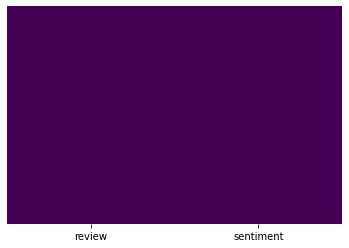

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.heatmap(movies.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

In [12]:
movies.dropna()
movies.drop_duplicates()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


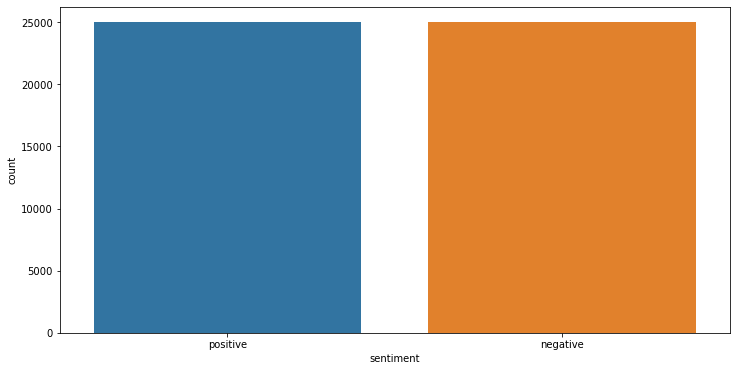

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=movies)

## word cloud

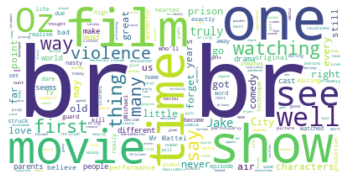

In [4]:
s = pd.Series(movies.review[0:10], dtype="string")
# Concatenating a single Series into a string
t=s.str.cat(sep=',')
# Import the word cloud function  
 
from wordcloud import WordCloud, STOPWORDS
# Create and generate a word cloud image 
my_cloud =  WordCloud(background_color='white', stopwords=STOPWORDS).generate(t)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")
# Don't forget to show the final image
plt.show()

## Language detection of product reviews

In [19]:
from langdetect import detect_langs

def DetectLanguage(text):
    language=str(detect_langs(text)).split(':')[0][1:]
    return language
# Assign the list to a new feature 
moviesreduit=movies.iloc[0:50,:]
moviesreduit['language'] = moviesreduit.review.apply(DetectLanguage)
print (moviesreduit.head(3))



                                              review sentiment language
0  One of the other reviewers has mentioned that ...  positive       en
1  A wonderful little production. <br /><br />The...  positive       en
2  I thought this was a wonderful way to spend ti...  positive       en


In [18]:
temp = moviesreduit.groupby('language')['review'].count().reset_index().sort_values(by='language',ascending=False)
temp.style.background_gradient(cmap='Purples')

,language,review
0,en,50


In [7]:
import spacy
from spacy import displacy

text = t
nlp = spacy.load('en_core_web_lg')
doc = nlp(text)
displacy.render(doc, style="ent",jupyter = True)
for entity in doc.ents:
    print(entity.text + ' - ' + entity.label_ + ' - ' + str(spacy.explain(entity.label_)))

One - CARDINAL - Numerals that do not fall under another type
just 1 Oz - TIME - Times smaller than a day
first - ORDINAL - "first", "second", etc.
Oz - PERSON - People, including fictional
OZ - PRODUCT - Objects, vehicles, foods, etc. (not services)
the Oswald Maximum Security State Penitentary - ORG - Companies, agencies, institutions, etc.
Emerald City - GPE - Countries, cities, states
Em City - GPE - Countries, cities, states
Aryans - NORP - Nationalities or religious or political groups
Muslims - NORP - Nationalities or religious or political groups
Latinos - NORP - Nationalities or religious or political groups
Christians - NORP - Nationalities or religious or political groups
Italians - NORP - Nationalities or religious or political groups
Irish - NORP - Nationalities or religious or political groups
first - ORDINAL - "first", "second", etc.
Oz - PERSON - People, including fictional
Michael Sheen - PERSON - People, including fictional
Williams - PERSON - People, including fictio

# Text Processing

In [ ]:
import re                                  # library for regular expression operations
import string                              # for string operations
from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

In [ ]:
# Create a list of lists, containing the tokens from list_tweets
#tokens = [word_tokenize(item) for item in tweets_list]

# Remove characters and digits , i.e. retain only letters
#letters = [[word for word in item if word.isalpha()] for item in tokens]
# Remove characters, i.e. retain only letters and digits
#let_digits = [[word for word in item if word.isalnum()] for item in tokens]
# Remove letters and characters, retain only digits
#digits = [[word for word in item if word.isdigit()] for item in tokens]

In [65]:
# Spacy preporcessing 
#Stop words
#importing stop words from English language.
import spacy
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
import re 

# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load('en')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

# Creating our tokenizer function
def spacy_tokenizer_cleaner(sentence):
    cleanr = re.compile('<.*?>')
    sentence = re.sub(cleanr, '', sentence)
    # Normalize text
    sentence = re.sub(r"[^a-zA-Z0-9]", " ", sentence.lower())
    # Remove urls
    sentence = re.sub(r"http\S+|www\S+|https\S+", '', sentence, flags=re.MULTILINE)
    # Remove user @ references 
    sentence = re.sub(r'\@\w+','', sentence)
    # remove old style retweet text "RT"
    sentence= re.sub(r'^RT[\s]+', '', sentence)

    # remove hyperlinks
    sentence = re.sub(r'https?:\/\/.*[\r\n]*', '', sentence)

    # remove hashtags
    # only removing the hash # sign from the word
    sentence= re.sub(r'#', '',sentence)
    # Creating our token object, which is used to create documents with linguistic annotations.
    
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return ' '.join(mytokens)
T=spacy_tokenizer_cleaner(t)
print(T)

reviewers mentioned watching 1 oz episode hooked right exactly happened thing struck oz brutality unflinching scenes violence set right word trust faint hearted timid pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements far away main appeal fact goes shows wouldn t dare forget pretty pictures painted mainstream audiences forget charm forget romance oz doesn t mess episode saw struck nasty surreal couldn t ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order away mannered middle class inmates turned prison bitches lack street skills prison experience watching oz comfortable uncomfortable vie

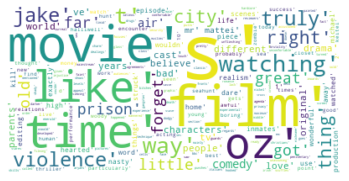

In [18]:
# Import the word cloud function  
 
from wordcloud import WordCloud, STOPWORDS
# Create and generate a word cloud image 
my_cloud =  WordCloud(background_color='white', stopwords=STOPWORDS).generate(str(T))

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")
# Don't forget to show the final image
plt.show()

## Clean our movies 

In [66]:

movies['review_cleaned'] = movies.review.apply(spacy_tokenizer_cleaner)


## Data Preparation for Modeling 
==>Machine learning algorithms depend highly on the quality and quantity of data. It is important that you provide these algorithms the correct data. Data preparation is a large subject that can involve many iterations, exploration, and analysis. 

    Feature engineering
    Extracting some useful features
    Feautres selections
This step depend a lot of experts, ..etc.

    EDA After  Feature Engineering
Here we do additional analysis to look for the quality of the new feature "it will give us additional information or not"
# Feature Extraction 
## n_char

In [22]:
len_positive = [len(x) for x in movies.loc[movies['sentiment']=='positive', 'review']]
len_negative = [len(x) for x in movies.loc[movies['sentiment']=='negative', 'review']]
print (np.mean(len_positive ), np.mean(len_negative))

1324.79768 1294.06436


In [24]:
movies['n_char']=movies.review.apply(lambda x:len(x))

## n_words

In [26]:
# Import the required packages from nltk
# from nltk.stem import PorterStemmer, WordNetLemmatizer
#from nltk import word_tokenize
# Tokenize each item in the review column
# Create a new feature for the lengh of each review
#movies['n_words'] =movies.review.apply(lambda x: len(word_tokenize(x)))

In [27]:
# using spacy 
# Word tokenization
from spacy.lang.en import English

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()
# Tokenize each item in the review column
# Create a new feature for the lengh of each review
movies['n_words'] =movies.review.apply(lambda x: len(nlp(x)))

In [28]:
movies.loc[movies['sentiment']=='positive', 'n_words'].mean(),movies.loc[movies['sentiment']=='negative', 'n_words'].mean()

(270.57368, 268.15484)

In [29]:
N_Digit_positive = [sum(char.isnumeric() for char in x) for x in movies.loc[movies['sentiment']=='positive', 'review']]
N_Digit_negative = [sum(char.isnumeric() for char in x) for x in movies.loc[movies['sentiment']=='negative', 'review']]
print(np.mean(N_Digit_positive), np.mean(N_Digit_negative))

3.31544 3.15352


In [30]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

movies['punct%'] = movies['review'].apply(lambda x: count_punct(x))

In [67]:
movies.head(5)

,review,sentiment,target,review_cleaned,punct%,n_char,n_words
0,One of the other reviewers has mentioned that ...,positive,1,reviewers mentioned watching 1 oz episode hook...,5.4,1761,359
1,A wonderful little production. <br /><br />The...,positive,1,wonderful little production filming technique ...,5.3,998,191
2,I thought this was a wonderful way to spend ti...,positive,1,thought wonderful way spend time hot summer we...,5.3,926,193
3,Basically there's a family where a little boy ...,negative,0,basically s family little boy jake thinks s zo...,6.9,748,154
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,petter mattei s love time money visually stunn...,5.1,1317,257


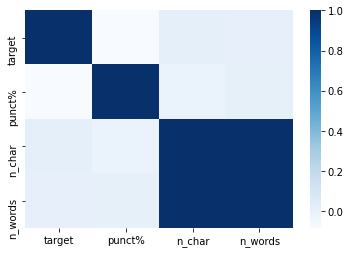

In [62]:
import seaborn as sns
# check correlation
plt.figure(figsize=(6,4))
sns.heatmap(movies.corr(),cmap='Blues',annot=False) 

#  Machine Learning-Based Approaches
##  train_test_split

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,ENGLISH_STOP_WORDS
#
 
X = movies['review_cleaned'] # the features we want to analyze
y = movies['sentiment'] # the labels, or answers, we want to test against


X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.2, random_state=123,stratify=y)
encoder = LabelEncoder()
encoder.fit(y_train)

y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train",y_train.shape)
print("y_test",y_test.shape)
print("X_train",X_train.shape)
print("X_test",X_test.shape)

y_train (40000, 1)
y_test (10000, 1)
X_train (40000,)
X_test (10000,)


# Naive Bayes classifier
##  Bag-of-words

In [69]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
#len_train = [len(x) for x in X_train]
#len_test = [len(x) for x in X_test]
#dig_train = [sum(char.isnumeric() for char in x) for x in X_train]
#dig_test = [sum(char.isnumeric() for char in x) for x in X_test]
    
# Not alpha numeric:
#nan_train = X_train.str.count('\W')
#nan_test = X_test.str.count('\W')
# tokenizer = spacy_tokenizer
vectorizer = CountVectorizer(ngram_range=(1, 2),min_df=2, max_df=1500).fit(X_train)
X_train_cv =vectorizer.transform(X_train)
X_test_cv =vectorizer.transform(X_test)

def add_feature(X, feature_to_add):
    """
    Returns sparse feature matrix with added feature.
    feature_to_add can also be a list of features.
    """
    from scipy.sparse import csr_matrix, hstack
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')
#X_train_cv = add_feature(X_train_cv, [len_train, dig_train, nan_train])
#X_test_cv = add_feature(X_test_cv, [len_test, dig_test, nan_test])

NB=MultinomialNB(alpha=0.1)
NB.fit(X_train_cv, y_train)
score_cv=roc_auc_score(NB.predict(X_test_cv),y_test)
score_cv

0.8776021749885279

# TF-IDF

In [71]:
# Import the TfidfVectorizer and default list of English stop words
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
#len_train = [len(x) for x in X_train]
#len_test = [len(x) for x in X_test]
#dig_train = [sum(char.isnumeric() for char in x) for x in X_train]
#dig_test = [sum(char.isnumeric() for char in x) for x in X_test]
    
# Not alpha numeric:
#nan_train = X_train.str.count('\W')
#nan_test = X_test.str.count('\W')
tfidf = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS, ngram_range=(1, 2),min_df=3).fit(X_train)
X_train_tf = tfidf.transform(X_train)
X_test_tf = tfidf.transform(X_test)
#X_train_tf = add_feature(X_train_cv, [len_train, dig_train, nan_train])
#X_test_tf = add_feature(X_test_cv, [len_test, dig_test, nan_test])
NB=MultinomialNB(alpha=0.1)
NB.fit(X_train_tf, y_train)
score_tf=roc_auc_score(NB.predict(X_test_tf),y_test)

In [72]:
print(score)

0.8802047692262079


# Pipeline

We can use scikit-learn’s Pipeline to simplify the above code. A pipeline is defined as Sequentially apply a list of transforms and a final estimator. Intermediate steps of pipeline must implement fit and transform methods and the final estimator only needs to implement fit.
# Logistic Regression 

In [73]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
bow_vector = CountVectorizer(ngram_range=(1, 2),min_df=2, max_df=1500)
classifier = LogisticRegression()

# Create pipeline using Bag of Words
pipe = Pipeline([('vectorizer', bow_vector),
                 ('classifier', classifier)])
# model generation
pipe.fit(X_train,y_train)

# Predicting with a test dataset
predicted = pipe.predict(X_test)

# Model Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted))

Logistic Regression Accuracy: 0.8907
Logistic Regression Precision: 0.8822148307571904
Logistic Regression Recall: 0.9018


In [74]:
# Cross Validation Classification Report
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      5000
           1       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



# GridSearchCV+Tuning 
###  SVC Model 

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
# Setup the pipeline
tfidf_vector = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS, ngram_range=(1, 2),min_df=3).fit(X_train)
classifier = SVC()
steps = [('vectorizer', tfidf_vector),
         ('SVM', classifier)]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}


# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline,param_grid=parameters)

# Fit to the training set
cv.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

#  Deep Learning-Based Approaches

In [79]:
from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.layers import Flatten
from numpy import array
import tensorflow as tf

from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
layers = tf.keras.layers
# Import relevant classes/functions
from tensorflow.keras.preprocessing.text import  Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Transform the list of sentences into a list of words
all_words = ' '.join(movies['review_cleaned']).split(' ')
#all_words=[w for w in DOC ]
# Get number of unique words
vocab_size = len(set(all_words))
print(vocab_size)

102977


# Tf.Keras preprocessing

The second most important module of Keras is keras.preprocessing. You will see how to use the most important modules and functions to prepare raw data to the correct input shape. Keras provides functionalities that substitute the dictionary approach you learned before.

You will use the module keras.preprocessing.text.Tokenizer to create a dictionary of words using the method .fit_on_texts() and change the texts into numerical ids representing the index of each word on the dictionary using the method .texts_to_sequences().

Then, use the function .pad_sequences() from keras.preprocessing.sequence to make all the sequences have the same size (necessary for the model) by adding zeros on the small texts and cutting the big ones.

In [86]:
#embeded sentences 
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import  to_categorical
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(movies['review_cleaned'])
vocab_length = len(word_tokenizer.word_index) + 1
# Prepare the data
embedded_prep_data = word_tokenizer.texts_to_sequences(movies['review_cleaned'])
#padded sentences 
from nltk.tokenize import word_tokenize
word_count = lambda sentence: len(word_tokenize(sentence))
longest_sentence = max(movies['review_cleaned'], key=word_count)
length_long_sentence = len(word_tokenize(longest_sentence))
padded_prep_data= pad_sequences(embedded_prep_data, length_long_sentence, padding='post')
# Prepare the labels
encoder = LabelEncoder()
encoder.fit(movies.sentiment)
prep_labels = encoder.transform(movies.sentiment)

#prep_labels = tf.keras.utils.to_categorical(movies.sentiment)
print(padded_prep_data[0],prep_labels[0])
# Print the shapes
print(str(vocab_length))
print(str(length_long_sentence))
print(padded_prep_data.shape)
print(prep_labels.shape)

[1807  832   37 ...    0    0    0] 1
102977
1341
(50000, 1341)
(50000,)


In [89]:
# custumise our embeded  matrix or import GLOVE that accelearate the training process 
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('C:/Users/rzouga/Desktop/cv-fr-en/CV+diplome/jobopr/glove.6B/glove.6B.50d.txt', encoding="utf8")
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
 # embeddings_dictionary now contains words and corresponding GloVe embeddings for all the words.   

glove_file.close()

In [90]:
embedding_matrix = zeros((vocab_length, 50))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
#embedding_matrix now contains pretrained word embeddings for the words in our corpus.

In [91]:
#train and test the model 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_prep_data,prep_labels, test_size=0.10)


In [92]:
#hybrid CNN-LSTM:
#Convolutional neural networks have been found to work well with text data ,the CNN Model for feature extraction 
#LSTM Model for interpreting the features across time steps.
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Multiply, Add, LSTM, LeakyReLU
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
wordvec_dim=50
model = tf.keras.Sequential()
model.add(layers.Embedding(vocab_length, output_dim=wordvec_dim, weights=[embedding_matrix], input_length=length_long_sentence, trainable=False))

model.add(layers.Conv1D(100, 5, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=4))
model.add(LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.15))
model.add(LSTM(64, return_sequences=False, dropout=0.2, recurrent_dropout=0.15))
model.add(Dense(16))
model.add(Dropout(rate=0.25))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1341, 50)          5148850   
_________________________________________________________________
conv1d (Conv1D)              (None, 1337, 100)         25100     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 334, 100)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 334, 64)           42240     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 16)                1040      
_________________________________________________________________
dropout (Dropout)            (None, 16)                0

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=5, verbose=0, validation_split=0.1)

In [ ]:
loss, accuracy = model.evaluate( X_test, y_test, verbose=0)
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
plot_history(history)
print('Accuracy: %f' % (accuracy*100))
print('loss: %f' % (loss*100))

In [ ]:
#Predict new data :
new_comment= ['horrible ,pathetic president']
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(corpus)
vocab_length = len(word_tokenizer.word_index) + 1
embedded_new_comment = word_tokenizer.texts_to_sequences(new_comment)
padded = pad_sequences(embedded_new_comment,length_long_sentence, padding='post')
pred = model.predict(padded)
print(pred)

# Other architecture:

In [ ]:
# Hyper-parameters
output_dir = 'model_output/conv'
epochs = 4
batch_size = 128
n_dim = 64
n_unique_words = 5000
n_words_to_skip = 50
max_review_length = 200
pad_type = trunc_type = 'pre'
drop_embed = 0.2
n_dense = 256
dropout = 0.2
n_conv = 256
k_conv = 3
# Design the Convolution Network Architecture
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length))
model.add(SpatialDropout1D(drop_embed))
model.add(Conv1D(n_conv, k_conv, activation='relu'))
model.add(GlobalMaxPool1D())
model.add(Dense(n_dense, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))
#Check the Model Summary
print(model.summary())
#Create Model Checkpoint

modelcheckpoint = ModelCheckpoint(filepath=output_dir+'/weights.{epoch:02d}.hdf5')
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

#Compile the Model

model.compile(loss='binary_crossentropy', optimizer='adam',
    metrics=['accuracy'])

#Train the Model

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, 
    verbose=1, validation_split=.20,
    callbacks=[modelcheckpoint])

#Load the Best Weights and Predict

# In my case it was the fourth one: 'weights.04.hdf5'
model.load_weights(output_dir+'/weights.04.hdf5')
y_hat = model.predict_proba(X_valid)

In [ ]:
# Calculate the ROC AUC Score

pct_auc = roc_auc_score(y_valid, y_hat) * 100
print('{:0.2f}'.format(pct_auc)

In [ ]:
#Plot the Area Under the Curve

fpr, tpr, _ = sklearn.metrics.roc_curve(y_valid, y_hat)
roc_auc = sklearn.metrics.auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Word2Vec

In [ ]:
%%time
documents = [_text.split() for _text in df_train.text] 

In [ ]:
w2v_model = gensim.models.word2vec.Word2Vec(size=W2V_SIZE, 
                                            window=W2V_WINDOW, 
                                            min_count=W2V_MIN_COUNT, 
                                            workers=8)


w2v_model.build_vocab(documents)



In [ ]:
words = w2v_model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

In [ ]:
w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

In [ ]:
w2v_model.most_similar("love")

In [ ]:

Tokenize Text

%%time
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.text)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)



In [ ]:
%%time
x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.text), maxlen=SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.text), maxlen=SEQUENCE_LENGTH)

In [ ]:

# Embedding layer

embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)



In [ ]:
# Predict
def decode_sentiment(score, include_neutral=True):
    if include_neutral:        
        label = NEUTRAL
        if score <= SENTIMENT_THRESHOLDS[0]:
            label = NEGATIVE
        elif score >= SENTIMENT_THRESHOLDS[1]:
            label = POSITIVE

        return label
    else:
        return NEGATIVE if score < 0.5 else POSITIVE
    
def predict(text, include_neutral=True):
    start_at = time.time()
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=SEQUENCE_LENGTH)
    # Predict
    score = model.predict([x_test])[0]
    # Decode sentiment
    label = decode_sentiment(score, include_neutral=include_neutral)

    return {"label": label, "score": float(score),
       "elapsed_time": time.time()-start_at}     

In [ ]:
predict("I hate the rain")